# Hometask 8

## Task 1

Импортируйте библиотеки pandas, numpy и matplotlib.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [87]:
# Импортируйте библиотеки pandas, numpy и matplotlib.
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
# Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
from sklearn.datasets import load_boston

boston = load_boston()
data = boston["data"]
feature_names = boston["feature_names"]
target = boston["target"]

data.shape

/home/nevl/anaconda3/envs/learn/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

(506, 13)

In [89]:
# Создайте датафреймы X и y из этих данных.
X = pd.DataFrame(data, columns=feature_names)

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [90]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [91]:
y = pd.DataFrame(target, columns=["price"])

y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [92]:
# Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
# с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных,
# при этом аргумент random_state должен быть равен 42.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
# Масштабируйте данные с помощью StandardScaler.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [94]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


In [95]:
X_test_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.476787,-0.440186,-1.149219,-0.25,-0.348009,0.386286,0.537480,-0.548087,-0.582846,-0.729893,-1.338941,0.413084,-0.608716
1,-0.481548,1.228922,-0.796429,4.00,-0.930972,0.904026,-1.243458,0.167253,-0.692532,-0.967732,-0.780821,0.428606,-1.373038
2,-0.474906,-0.440186,2.392130,-0.25,0.568076,-0.269215,1.048804,-0.937018,-0.692532,1.620178,0.614479,0.353326,0.643885
3,-0.476806,-0.440186,-0.138686,-0.25,-1.245586,-0.145078,-2.116535,0.771841,-0.692532,-0.678928,0.112171,0.362195,-1.096995
4,0.196583,-0.440186,0.951075,-0.25,1.530427,0.206137,0.805317,-0.687076,1.501204,1.365351,0.670291,0.297669,0.532912


In [96]:
X_train_scaled.shape, X_test_scaled.shape

((404, 13), (102, 13))

In [97]:
# Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('Before:\t{}'.format(X_train_scaled.shape))
print('After:\t{}'.format(X_train_tsne.shape))

/home/nevl/anaconda3/envs/learn/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


Before:	(404, 13)
After:	(404, 2)


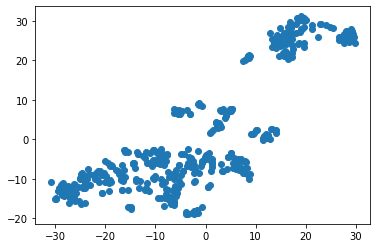

In [98]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

In [99]:
X_train_tsne_df = pd.DataFrame(X_train_tsne, columns=['First', 'Second'])

X_train_tsne_df.head()

,First,Second
0,18.104149,29.184141
1,3.364461,-7.909668
2,-20.716751,-8.947255
3,27.654587,26.636459
4,4.359419,-7.439229


<AxesSubplot:xlabel='First', ylabel='Second'>

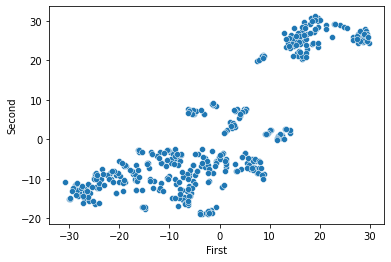

In [100]:
# Постройте диаграмму рассеяния на этих данных.
import seaborn as sns

sns.scatterplot(data=X_train_tsne_df, x='First', y='Second')

## Task 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [101]:
# С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
# используйте все признаки из датафрейма X_train.
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

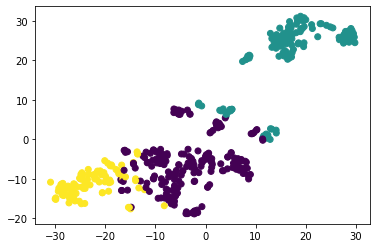

In [102]:
labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

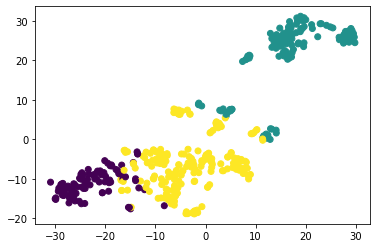

In [103]:
# Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
kmeans2 = KMeans(n_clusters=3, max_iter=100, random_state=42)

labels_train2 = kmeans2.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train2)

plt.show()

<AxesSubplot:xlabel='First', ylabel='Second'>

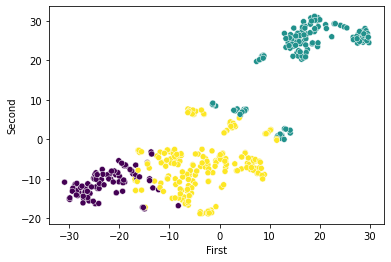

In [104]:
# Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
# и раскрасьте точки из разных кластеров разными цветами.
sns.scatterplot(data=X_train_tsne_df, x='First', y='Second', c=labels_train2)

In [105]:
# Вычислите средние значения price и CRIM в разных кластерах.
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [106]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28


In [107]:
len(X_train['CRIM'][labels_train2==0]), len(X_train['CRIM'][labels_train2==1]), len(X_train['CRIM'][labels_train2==2])

(86, 127, 191)

In [108]:
for i in range(0, 3):
    crim_mean = X_train['CRIM'][labels_train2 == i].mean()
    price_mean = y_train[labels_train2 == i].mean()
    
    print('{} cluster mean: CRIM = {}, price = {}'.format(i, crim_mean, price_mean))

0 cluster mean: CRIM = 0.07356558139534886, price = price    27.788372
dtype: float64
1 cluster mean: CRIM = 10.797028425196853, price = price    16.165354
dtype: float64
2 cluster mean: CRIM = 0.42166020942408367, price = price    24.958115
dtype: float64


## Task 3

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [109]:
# Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
labels_test = kmeans.predict(X_test_scaled)
len(labels_test)

102

In [110]:
#Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.
for i in range(0, 3):
    crim_mean = X_test['CRIM'][labels_test == i].mean()
    price_mean = y_test[labels_test == i].mean()
    
    print('{} cluster mean: CRIM = {}, price = {}'.format(i, crim_mean, price_mean))

0 cluster mean: CRIM = 0.2845831111111111, price = price    22.031111
dtype: float64
1 cluster mean: CRIM = 10.165531142857143, price = price    16.437143
dtype: float64
2 cluster mean: CRIM = 0.07985181818181818, price = price    28.413636
dtype: float64
